In [2]:
# read the csv files 
import pandas as pd
import sys, os, re, glob
import numpy as np

from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from matplotlib import pylab

#import seaborn as sns

import seaborn as sns

########----Power function ----------########

alpha=4.28*10**-17
flu1= 1.0*10**16       #fluence
flu2= 2.1*10**16
flu3= 3.0*10**16
h=4.4                  #width of the sensor
l=1.8                  #lenght of the sensor
dd=130*10**-4          #depletion depth
Vb=600                 #bias voltage
Tr=273                  #reference Temperature
Ta=7000                #Activation Temperature
Qbl=0               #Q baseline from ROC's

Qr1=alpha*flu1*h*l*dd*Vb
Qr2=alpha*flu2*h*l*dd*Vb
Qr3=alpha*flu3*h*l*dd*Vb

print('Qr(T=20C) = ',Qr2)

Ts=[]
Ts_e=[]
Q1=[]
Q2=[]
Q3=[]
q1=[]
for T in range (248, 283):
    Ts.append(T)
    Ts_e.append(T - 273)

T0=261
Rt=3.109
for T in Ts:
    Q1.append(2*((T/Tr)**2)*np.exp(-Ta*(1/T - 1/Tr))+ Qbl)
    Q2.append(4*((T/Tr)**2)*np.exp(-Ta*(1/T - 1/Tr))+ Qbl)
    Q3.append(8*((T/Tr)**2)*np.exp(-Ta*(1/T - 1/Tr))+ Qbl)
    q1.append((T-T0)/Rt)
    
#print(Q1,Q2,Q3)

Q_T = pd.DataFrame()
Q_T['Ts']=Ts
Q_T['Ts_e']=Ts_e
Q_T['Q1']=Q1
Q_T['Q2']=Q2
Q_T['Q3']=Q3

#Q_T

#Qt=Qr3*((253/Tr)**2)*np.exp(-Ta*(1/253 - 1/Tr))
#Qt                                                  #expected 1.3 W


Qr(T=20C) =  55.52426880000002


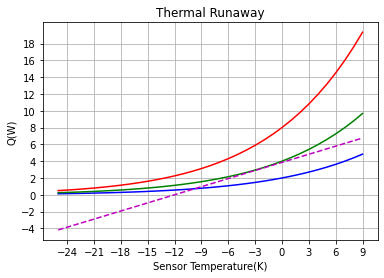

In [3]:
#plot Q(T) function

fig = plt.figure()
ax1 = fig.gca()
ax1.set_xticks(np.arange(-30, 30,3 ))
ax1.set_yticks(np.arange(-10, 20, 2))
ax1.set_ylabel('Q(W)')
ax1.set_xlabel('Sensor Temperature(K)')
ax1.set_title('Thermal Runaway')

#plt.plot(Ts,Q1,'r',Ts,Q2,'b',Ts,Q3,'g')
plt.plot(Ts_e,Q1,'b', Ts_e,Q2,'g', Ts_e,Q3,'r', Ts_e,q1,'m--')
plt.grid()
plt.show()

In [4]:
qref=[]
Tsref=[]
for T in Ts:
    if T>(T0-1):
        qref.append(((T-T0)/Rt)*((Tr/T)**2)*np.exp(Ta*(1/T - 1/Tr)))
        Tsref.append(T-273)

df_qref=pd.DataFrame()
df_qref['qref']=qref
df_qref['Tsref']=Tsref
df_qref

,qref,Tsref
0,0.000000,-12
1,1.024787,-11
2,1.837536,-10
3,2.473125,-9
4,2.961056,-8
5,3.326270,-7
6,3.589839,-6
7,3.769551,-5
8,3.880409,-4
9,3.935049,-3


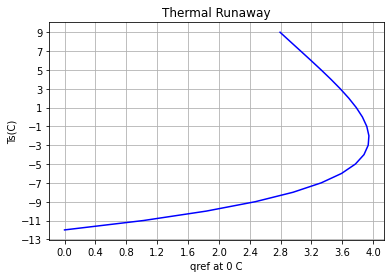

In [5]:
#plot Qref(T) function

fig3 = plt.figure()
ax3 = fig3.gca()
ax3.set_xticks(np.arange(0, 5, 0.4 ))
ax3.set_yticks(np.arange(-15, 15, 2))
ax3.set_ylabel('Ts(C)')
ax3.set_xlabel('qref at 0 C')
ax3.set_title('Thermal Runaway')

#plt.plot(Ts,Q1,'r',Ts,Q2,'b',Ts,Q3,'g')
plt.plot(qref,Tsref,'b')
plt.grid()
plt.show()

In [11]:
Tscrit=T0+ T0**2/Ta
Tscrit,T0


(270.73157142857144, 261)

In [10]:
T0c= Tscrit -Tscrit**2/(Ta+500)
T0c

260.95882692614697